## Observations and Insights 

In [174]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [175]:
# Checking the number of mice.
count_mice = len(combined_data['Mouse ID'].unique())
count_mice

249

In [176]:
count_rows = len(combined_data['Mouse ID'])
count_rows

1893

In [177]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.groupby(['Mouse ID','Timepoint']).ngroups
duplicate_mice



1888

In [ ]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_data = combined_data[combined_data.duplicated(['Mouse ID','Timepoint'])]
duplicate_data

In [178]:
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [179]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

dup = combined_data[combined_data["Mouse ID"] == "g989"].index
dup


Int64Index([908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920], dtype='int64')

In [180]:
clean_data = combined_data.drop(dup, inplace=True)
clean_data

In [181]:
# Checking the number of mice in the clean DataFrame.
len(clean_data['Mouse ID'].unique())

TypeError: 'NoneType' object is not subscriptable

## Summary Statistics

In [182]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
stat_mean = combined_data.groupby(['Drug Regimen'])['Age_months', 'Weight (g)', 'Tumor Volume (mm3)'].mean().reset_index()
stat_median = combined_data.groupby(['Drug Regimen'])['Age_months', 'Weight (g)', 'Tumor Volume (mm3)'].median().reset_index()
stat_var = combined_data.groupby(['Drug Regimen'])['Age_months', 'Weight (g)', 'Tumor Volume (mm3)'].var().reset_index()
stat_std = combined_data.groupby(['Drug Regimen'])['Age_months', 'Weight (g)', 'Tumor Volume (mm3)'].std().reset_index()
stat_sem = combined_data.groupby(['Drug Regimen'])['Age_months', 'Weight (g)', 'Tumor Volume (mm3)'].sem().reset_index()
stat_sem
# stat_summ = pd.merge(stat_mean,stat_median,stat_var,stat_std,stat_sem)


# This method is the most straighforward, creating multiple series and putting them all together at the end.



C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.
C:\Users\dlefo\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
C:\Users\dlefo\anaconda3\envs\Pyt

,Drug Regimen,Age_months,Weight (g),Tumor Volume (mm3)
0,Capomulin,0.509136,0.180169,0.329346
1,Ceftamin,0.604977,0.118535,0.469821
2,Infubinol,0.562919,0.163684,0.492236
3,Ketapril,0.439030,0.134333,0.603860
4,Naftisol,0.492430,0.109930,0.596466
5,Placebo,0.472356,0.136615,0.581331
6,Propriva,0.570986,0.140799,0.544332
7,Ramicane,0.393825,0.214244,0.320955
8,Stelasyn,0.590143,0.122169,0.573111
9,Zoniferol,0.428895,0.105229,0.516398


In [227]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# summ_stat2 = combined_data.agg({'Age_months':['mean','median','var','std','sem'],
#                                     'Weight (g)':['mean','median','var','std','sem'],
#                                     'Tumor Volume (mm3)':['mean','median','var','std','sem']}).groupby(["Drug Regimen'])
summ_stat2 = combined_data.describe()
summ_stat2
# This method produces everything in a single groupby function


,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1880.000000,1880.000000,1880.000000,1880.000000,1880.000000
mean,12.757979,25.660106,19.606383,50.435293,1.025000
std,7.181998,3.935064,14.094238,8.914197,1.139971
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.933454,1.000000
75%,19.250000,29.000000,30.000000,56.324075,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


## Bar and Pie Charts

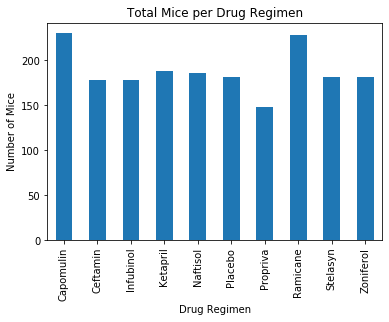

In [189]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
tot_mice = combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()
x_axis = np.arange(len(tot_mice))

tot_mice.plot(kind="bar")

plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()


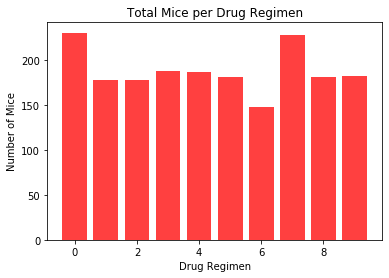

In [188]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

tot_mice = combined_data.groupby(['Drug Regimen'])['Mouse ID'].count()
x_axis = np.arange(len(tot_mice))

plt.title("Total Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.bar(x_axis, tot_mice, facecolor="red", alpha=0.75, align="center")

plt.show()



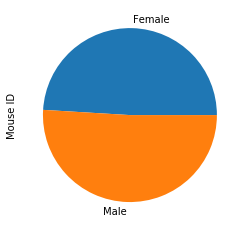

In [191]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_mice = combined_data.groupby(['Sex'])['Mouse ID'].count()
gender_mice.plot(kind="pie")

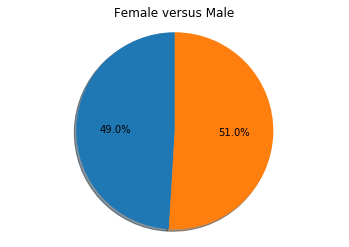

In [194]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Female versus Male")
plt.pie(gender_mice,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

## Quartiles, Outliers and Boxplots

In [240]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

tumor_volume = combined_data.groupby(["Drug Regimen","Mouse ID"],as_index=False).agg({"Timepoint": "max", "Tumor Volume (mm3)": "last"})
tumor_volume
# tumor_regimen = tumor_volume

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,45,38.982878
1,Capomulin,b742,45,38.939633
2,Capomulin,f966,20,30.485985
3,Capomulin,g288,45,37.074024
4,Capomulin,g316,45,40.159220
...,...,...,...,...
243,Zoniferol,q633,45,70.827796
244,Zoniferol,s337,45,62.109651
245,Zoniferol,w140,5,47.717952
246,Zoniferol,w575,45,68.401286


In [268]:
# Put treatments into a list for for loop (and later for plot labels)
Capomulin = []
Ramicane = []
Infubinol = [] 
Ceftamin = []

for index, row in tumor_volume.iterrows():
    if tumor_volume["Drug Regimen"].iloc[index] == "Capomulin":
        Capomulin.append(tumor_volume["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume["Drug Regimen"].iloc[index] == "Ramicane":
        Ramicane.append(tumor_volume["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume["Drug Regimen"].iloc[index] == "Infubinol":
        Infubinol.append(tumor_volume["Tumor Volume (mm3)"].iloc[index])
    elif tumor_volume["Drug Regimen"].iloc[index] == "Ceftamin":
        Ceftamin.append(tumor_volume["Tumor Volume (mm3)"].iloc[index])

# Create empty list to fill with tumor vol data (for plotting)
final_tumor_volume = pd.DataFrame([Capomulin,Ramicane,Infubinol,Ceftamin])
final_tumor_volume

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor_volume[0].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    
print(f"The lower quartile of Tumor Volume for Capomulin is: {lowerq}")
print(f"The upper quartile of Tumor Volume for Capomulin is: {upperq}")
print(f"The interquartile range of Tumor Volume for Capomulin is: {iqr}")
print(f"The the median of Tumor Volume for Capomulin is: {quartiles[0.5]} ")
   
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

The lower quartile of Tumor Volume for Capomulin is: 38.83906288
The upper quartile of Tumor Volume for Capomulin is: 64.24287183749999
The interquartile range of Tumor Volume for Capomulin is: 25.40380895749999
The the median of Tumor Volume for Capomulin is: 50.991116965 
Values below 0.733349443750015 could be outliers.
Values above 102.34858527374998 could be outliers.


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

 # The second example again looks at the LAX temperature data set and computes quantiles
# temperature_df = pd.read_csv('../Resources/lax_temperature.csv')
# temperatures = temperature_df['HourlyDryBulbTemperature']

# fig1, ax1 = plt.subplots()
# ax1.set_title('Temperatures at LAX')
# ax1.set_ylabel('Temperature (°F)')
# ax1.boxplot(temperatures)
# plt.show()

In [ ]:
# If the data is in a dataframe, we use pandas to give quartile calculations
# quartiles = temperatures.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq

# print(f"The lower quartile of temperatures is: {lowerq}")
# print(f"The upper quartile of temperatures is: {upperq}")
# print(f"The interquartile range of temperatures is: {iqr}")
# print(f"The the median of temperatures is: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)
# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


# Give our graph axis labels
# plt.xlabel("Time With MatPlotLib")
# plt.ylabel("How Cool MatPlotLib Seems")

# # Have to plot our chart once again as it doesn't stick after being shown
# plt.plot(x_axis, e_x)
# plt.show()



In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Generate a scatter plot of year versus violent crime rate
# year = crime_data.iloc[:,0]
# violent_crime_rate = crime_data.iloc[:,3]
# plt.scatter(year,violent_crime_rate)
# plt.xticks(year, rotation=90)
# plt.xlabel('Year')
# plt.ylabel('Violent Crime Rate')
# plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on year versus violent crime rate
# vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(year, violent_crime_rate)

# Create equation of line to calculate predicted violent crime rate
# vc_fit = vc_slope * year + vc_int
